<a href="https://colab.research.google.com/github/AftabUdaipurwala/ApporachingAlmostAnyMachineLearningProblem/blob/master/AAAMLP1_C1_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [3]:
data = datasets.fetch_openml('mnist_784', return_X_y=True,version=1)
pixel_values, targets = data
targets = targets.astype(int)


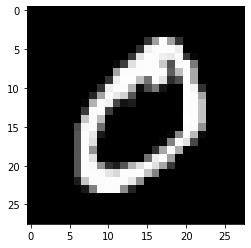

In [27]:
single_image = np.array(pixel_values.iloc[1]).reshape(28,28)
plt.imshow(single_image,cmap='gray')